**Exercícios de Aprendizado Supervisionado**

In [ ]:
#Importando bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


**Download Dataset** - [Crop recommendation data](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/4GBWFV)

O dataset **Crop Recommendation Data** contém um total de 1697 amostras, referente as características de solo e condições ambientais para o crescimento de diversas culturas.

Os dados estão estruturados nas seguintes colunas:
N (Nitrogênio): Quantidade de nitrogênio no solo.

*   P (Fósforo): Quantidade de fósforo no solo
*   K (Potássio): Quantidade de potássio no solo
*   temperature (Temperatura): Temperatura ambiente em graus Celsius
*   humidity (Umidade): Umidade relativa do ar em porcentagem
ph: Valor de pH do solo
*   rainfall (Precipitação): Quantidade de precipitação em mm
*   label: A cultura recomendada para plantio, com base nas condições descritas


**Importante:** em *label*, temos os rótulos (classes) que representam diferentes culturas agrícolas: Rice (Arroz), Maize (Milho), Soyabeans (Soja), Beans (Feijão), Peas (Ervilhas), Groundnuts (Amendoins), Cowpeas (Feijão-caupi), Banana, Mango (Manga), Grapes (Uvas), Watermelon (Melancia), Apple (Maçã), Orange (Laranja), Cotton (Algodão) e Coffee (Café)

**Exercício 1 – Leitura Dataset**

Realize a leitura dos dados e exiba as informações gerais do dataset

Exiba quantas amostras existem por classe (label)


In [ ]:
#leitura dos dados
data = pd.read_csv('/content/sample_data/Crop_recommendation.csv')
data.info()

label_counts = data['label'].value_counts()
print(label_counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1697 non-null   int64  
 1   P            1697 non-null   int64  
 2   K            1697 non-null   int64  
 3   temperature  1697 non-null   float64
 4   humidity     1697 non-null   float64
 5   ph           1697 non-null   float64
 6   rainfall     1697 non-null   float64
 7   label        1697 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 106.2+ KB
label
rice          139
Soyabeans     130
banana        130
beans         125
cowpeas       122
orange        122
maize         119
coffee        110
peas          100
groundnuts    100
mango         100
grapes        100
watermelon    100
apple         100
cotton        100
Name: count, dtype: int64


**Exercício 2 – Preparação dos Dados, divisão treinamento e testes**

Realize a divisão dos dados em treinamento e testes

In [ ]:
#Preparacao dos dados
X = data.drop('label', axis=1)
y = data['label']

#Codificação de rótulos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

#Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



**Exercício 3 – Treinamento do Modelo (pode ser o K-NN ou Decision Tree)**

Escolha um algoritmo da biblioteca Scikit-learn que seja adequado para treinar um modelo de recomendação de plantio a partir das variaveis presentes no conjunto de dados.

In [ ]:
#Digite seu código aqui
Arvore = DecisionTreeClassifier(max_depth = 6)
Arvore.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

**Exercício 4 – Avaliar o Modelo**

Utilize a métrica adequada para avaliar o modelo a partir dos dados de treinamento

Acurácia do modelo: 0.9264705882352942


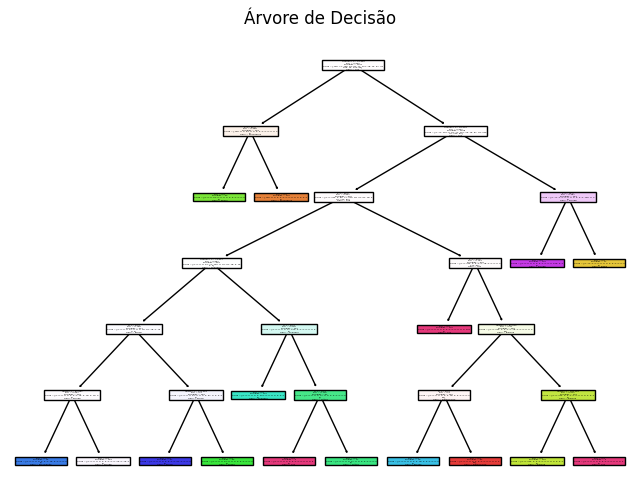

In [ ]:
#Digite seu código aqui
y_pred = Arvore.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)


# Visualizar a árvore de decisão em forma de gráfico
plt.figure(figsize=(8,6))
plot_tree(Arvore, feature_names=X.columns, class_names=label_encoder.classes_, filled=True)
plt.title('Árvore de Decisão')
plt.show()